# MLOps for NLP

## Understanding the problem 

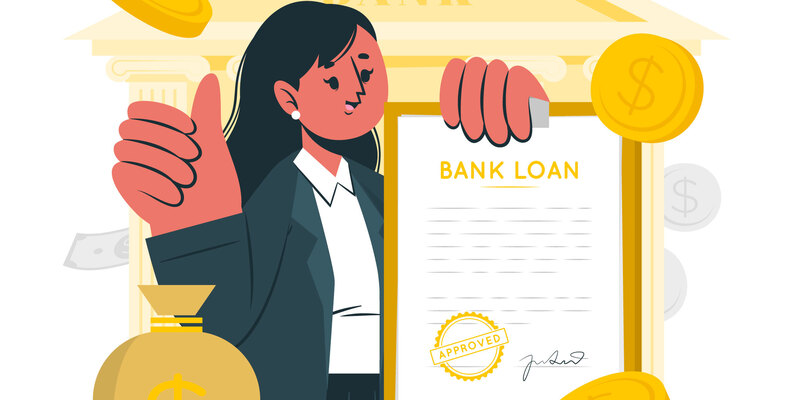

## Bank Loan Approval Prediction
We will learn the basics of MLOps using a simple use case of Loan Approval. We will start with data preprocessing till all the way upto deployment of the ML model 

## Setup

In [71]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu


## Data 

In [1]:
import pandas as pd

In [2]:
## Dataset link - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
DATASET = './loan_approval_dataset.csv'

In [3]:
df = pd.read_csv(DATASET)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Exploratory Data Analysis 

In [4]:
from collections import Counter 
import matplotlib.pyplot as plt 
import seaborn as sns 

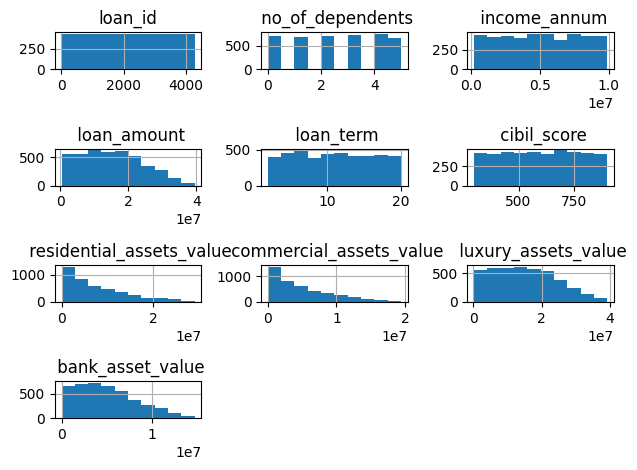

In [5]:
# Most commong tags
df.hist()
# plt.figure(figsize=(40, 22))  # Adjust the width and height as needed
plt.tight_layout()  # Optional: Improve spacing between subplots
plt.show()

In [6]:
# Renaming the column
df = df.rename(columns = {col_name: col_name.strip() for col_name in df.columns}) # Stripping the column name
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

### Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
df.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [11]:
df_processed = df.copy()

In [12]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'graduate':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['education'] = df_processed['education'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'approved':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['loan_status'] = df_processed['loan_status'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [14]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'yes':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['self_employed'] = df_processed['self_employed'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


### Feature Engineering

In [15]:
df_processed['total_asset'] = df_processed['luxury_assets_value'] + df_processed['commercial_assets_value'] + df_processed['residential_assets_value'] 
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_asset
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,42700000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,13700000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,44900000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,44800000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,50000000


## DVC

In [16]:
!dvc init --subdir

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [19]:
!dvc add loan_approval_dataset.csv
!git add.dvc/config
!git commit -m "Added dataset"

⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/home/thebeginner86/code/MLOps/ML/.dvc/cache/files/md5'|
                                                                                
!
  0%|          |Adding loan_approval_dataset.csv to ca0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /home/thebeginner86/code/0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 15.26file/s]

To track the changes with git, run:

	git add loan_approval_dataset.csv.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true
git: 'add.dvc/config' is not a git command. See 'git --help'.
On branch main
Your branch is up to date with 'origin/main'.

Changes 

In [20]:
!dvc dag

+-------------------------------+  
| loan_approval_dataset.csv.dvc |  
+-------------------------------+  


## Experiment tracking with MLFlow

### Setting up mlflow

In [25]:
import mlflow
import os

In [28]:
experiment_name = "loan approval"
ml_path = os.path.join(os.getcwd(),"mlruns")
mlflow.set_tracking_uri(uri=ml_path)
#  mlflow.set_tracking_uri(uri="http://localhost:8080")
# experiment_id = mlflow.set_experiment(experiment_name).experiment_id 
if not mlflow.get_experiment_by_name(experiment_name):
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
print(experiment_id)

906616594024732302


In [29]:
mlflow.get_experiment_by_name(experiment_name)

<Experiment: artifact_location='/home/thebeginner86/code/MLOps/ML/mlruns/906616594024732302', creation_time=1732610614245, experiment_id='906616594024732302', last_update_time=1732610614245, lifecycle_stage='active', name='loan approval', tags={}>

In [30]:
from xgboost import XGBClassifier 
import mlflow 
from sklearn.metrics import accuracy_score
from mlflow.models import infer_signature 
import warnings
warnings.filterwarnings('ignore')

In [31]:
dataset = mlflow.data.from_pandas(
    df_processed, name="Loan Approval Dataset", targets="loan_status"
)

In [32]:
test_size = 0.2 
train_df, val_df = train_test_split(df_processed, stratify=df.loan_status, test_size=test_size, random_state=1234) 

In [33]:
X_train = train_df.drop(columns = ['loan_status'], axis = 1) 
y_train = train_df['loan_status']

In [34]:
X_val = val_df.drop(columns = ['loan_status'], axis = 1) 
y_val = val_df['loan_status']

In [35]:
xgb_classifier = XGBClassifier(
    n_estimators=10, 
    max_depth=3, 
    learning_rate=1, 
    objective="binary:logistic", 
    random_state=123, 
)


In [36]:
with mlflow.start_run(experiment_id=experiment_id, run_name="initial experiment"):
    mlflow.log_input(dataset, context="training")
    xgb_classifier.fit(X_train, y_train) 
    clf_params = xgb_classifier.get_xgb_params() 
    mlflow.log_params(clf_params) 
    signature = infer_signature(X_train, xgb_classifier.predict(X_train))   # What is this infer_signature
    model_info = mlflow.xgboost.log_model(
        xgb_classifier, "loan classification", signature=signature
    ) 
    y_pred = xgb_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    mlflow.log_metric("accuracy", acc)

print("Accuracy achieved: ", acc)


Accuracy achieved:  0.9812646370023419


In [37]:
xgb_classifier_saved = mlflow.pyfunc.load_model(model_info.model_uri) 
y_pred = xgb_classifier_saved.predict(X_val)

In [38]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [39]:
acc = accuracy_score(y_val, y_pred)
mlflow.log_metric("accuracy", acc)

## Hyperparameters tuning using optuna

In [43]:
import math 
import numpy as np 
import seaborn as sns
import xgboost as xgb
import optuna
from sklearn.model_selection import cross_val_score

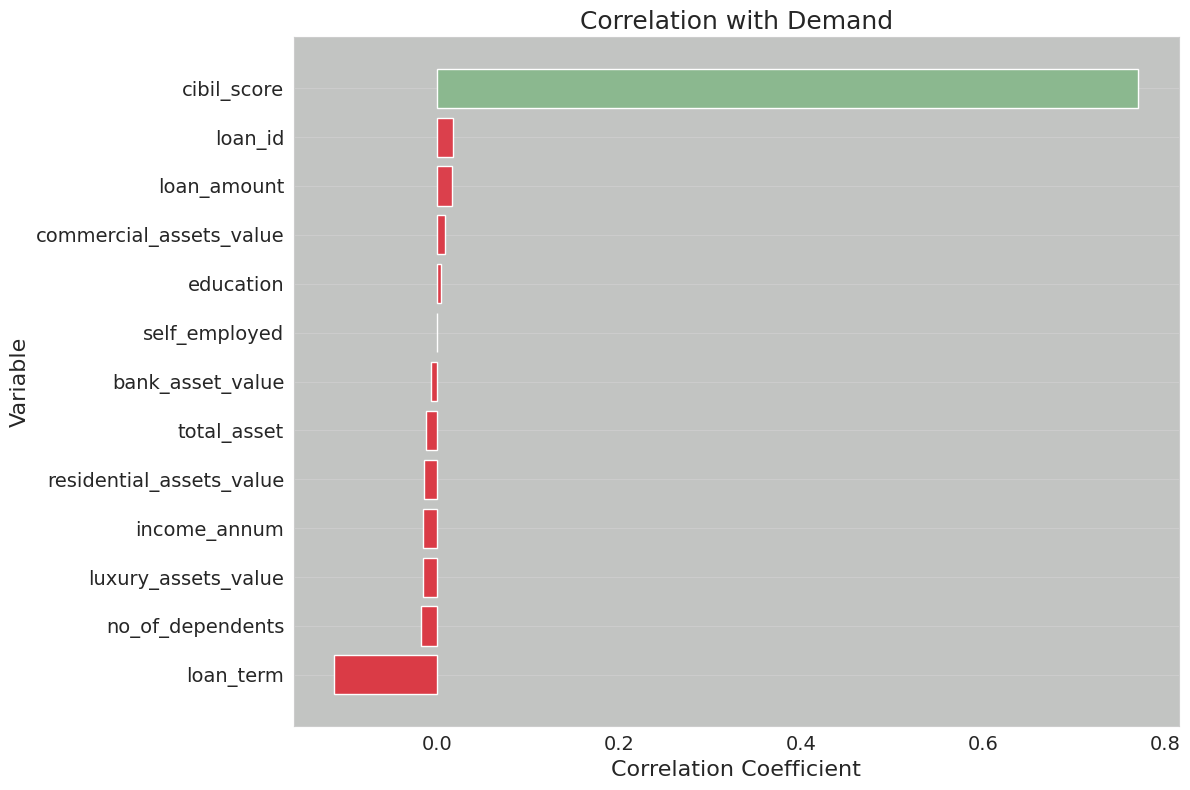

In [40]:
def plot_correlation(df, save_path=None): 
    """
    Plots the correlation of each variable in the dataframe with the demand column
    """
    correlations = df.corr()['loan_status'].drop('loan_status').sort_values()
    colors = sns.diverging_palette(10, 130, as_cmap=True) 
    color_mapped = correlations.map(colors) 

    sns.set_style(
        "whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5}
    )

    fig = plt.figure(figsize=(12, 8))
    plt.barh(correlations.index, correlations.values, color=color_mapped) 

    plt.title("Correlation with Demand", fontsize=18) 
    plt.xlabel("Correlation Coefficient", fontsize=16) 
    plt.ylabel("Variable", fontsize=16) 
    plt.xticks(fontsize=14) 
    plt.yticks(fontsize=14) 
    plt.grid(axis="x")

    plt.tight_layout()

    # plt.show()
    return fig 

correlation_plot = plot_correlation(df_processed)
    

In [41]:
def plot_feature_importance(model, booster): 
    """
    Plost feature importance for an XGBoost model.
    """ 
    fig, ax = plt.subplots(figsize=(10, 8)) 
    importance_type = "weight" if booster == "gblinear" else "gain" 
    xgb.plot_importance(
        model, 
        importance_type=importance_type, 
        ax=ax, 
        title=f"Feature Importance based on {importance_type}", 
    )
    plt.tight_layout() 
    plt.show()


In [44]:
# override Optuna's default logging to ERROR only 
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [45]:
def objective(trial):
    # Define the hyperparameters to optimize
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 110),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        # 'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
        # 'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        # 'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        # 'gamma': trial.suggest_loguniform('gamma', 1e-8, 1e-1),
        # 'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 1e-1),
        # 'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 1e-1),
    }
    
    # Create XGBoost classifier with suggested hyperparameters
    clf = XGBClassifier(**param)
    
    # Evaluate model using cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Return the negative mean accuracy because Optuna minimizes the objective function
    return -cv_scores.mean()

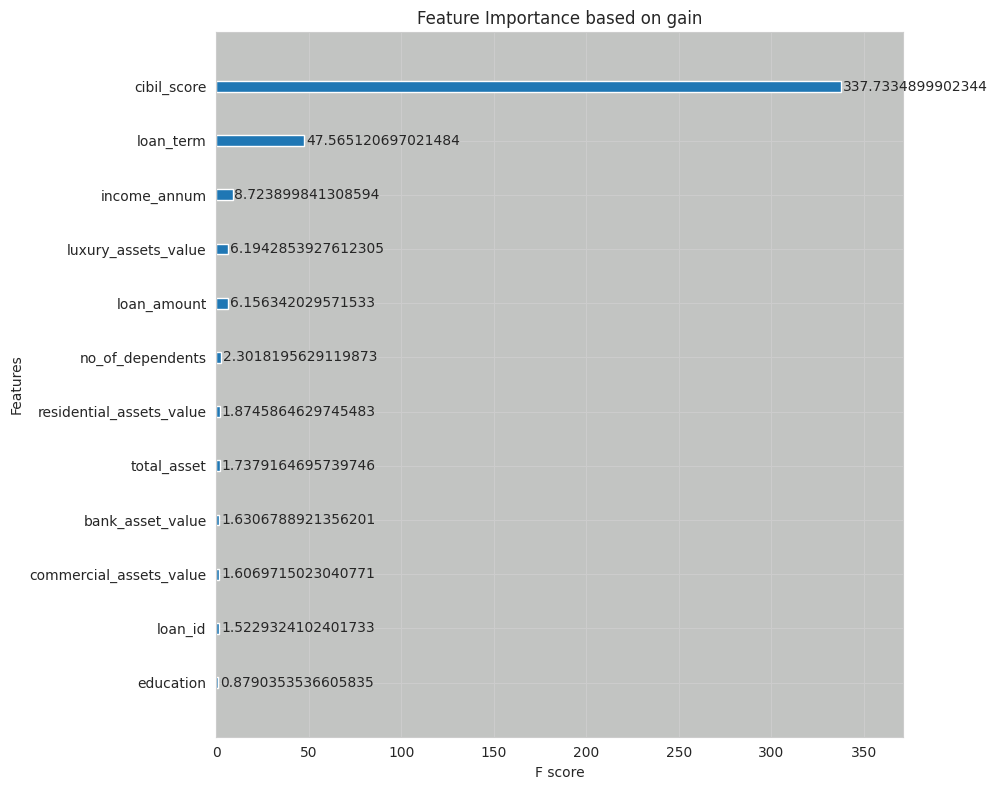

In [46]:
with mlflow.start_run(experiment_id=experiment_id, nested=True, run_name="hyperparameter_tune"):
    
    study = optuna.create_study(direction='minimize')

    study.optimize(objective, n_trials=5)
    
    mlflow.log_params(study.best_params) 
    mlflow.log_metric("acc", -study.best_value) 

    
    model = xgb.XGBClassifier(**study.best_params)
    model.fit(X_train, y_train)   #, eval_set=[(X_val, y_valid)], early_stopping_rounds=10, verbose=False)
    mlflow.log_figure(figure=correlation_plot, artifact_file="correlation_plot.png")

    importances = plot_feature_importance(model, booster=study.best_params.get("booster"))

    artifact_path = "model"

    mlflow.xgboost.log_model(
        xgb_model=model,
        artifact_path=artifact_path,
        input_example=X_train.iloc[[0]],
        model_format="ubj",
        metadata={"model_data_version": 1},
    )
    
    
    preds = model.predict(X_val)
    # print(preds)
    preds = [1 if x>0.5 else 0 for x in preds]
    acc = accuracy_score(y_val, preds)

    model_uri = mlflow.get_artifact_uri(artifact_path)
    

In [47]:
print(model_uri)
loan_classifier = mlflow.xgboost.load_model(model_uri)

/home/thebeginner86/code/MLOps/ML/mlruns/906616594024732302/7552867ca6d944c59515c5ce768ae91c/artifacts/model


## Model Registry

In [48]:
result = mlflow.register_model(
    model_uri, "xgboost-model"
)

Successfully registered model 'xgboost-model'.
Created version '1' of model 'xgboost-model'.


## Performance evaluation

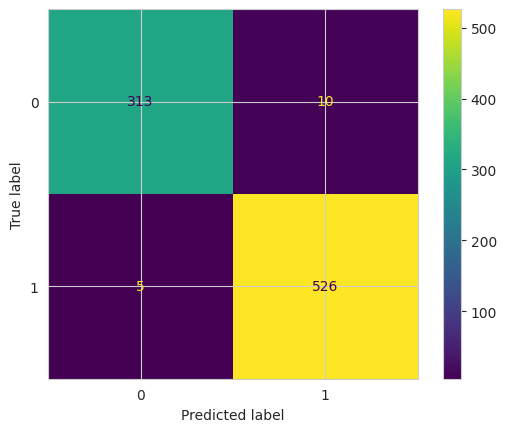

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = loan_classifier.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1])
disp.plot()
plt.show()

## Interpretability

In addition to comparing predicted results with actual values, we can also examine the inputs to our models. Which parts of the input influence the prediction the most? If the model is focusing on the wrong features, we need to investigate whether there's a hidden pattern we're missing or if the model is overfitting to incorrect features. Tools like SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) can help us understand feature importance. These tools show which features are most important by evaluating the model's performance without them. We can perform these inspections either broadly (e.g., for each class) or specifically (e.g., for a single prediction).







In [50]:
sample = X_val.iloc[0].values.reshape(1, -1).tolist()
model.predict(sample)
print(loan_classifier.predict_proba(sample))
print(y_val.iloc[0])


[[0.00451142 0.9954886 ]]
1


In [52]:
import lime.lime_tabular
import numpy as np
from sklearn.pipeline import make_pipeline

In [53]:
def classifier_fn(feature_values):
    y_output = loan_classifier.predict_proba(feature_values)
    return y_output

In [54]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    mode='classification',
    feature_names=X_train.columns, 
    class_names=[0,1], 
    # discretize_continuous=True
)


In [55]:
instance = X_val.iloc[0].values.reshape(1, -1) 
# Explain the prediction
exp = explainer.explain_instance(
    data_row=instance[0], 
    predict_fn = classifier_fn

)

# Show the explanation
exp.show_in_notebook(show_table=True)

## Deployment

### Setting up ray

In [56]:
import ray
from fastapi import FastAPI
from ray import serve
import requests
from starlette.requests import Request

In [57]:
if ray.is_initialized():
    ray.shutdown()

ray.init()
# Forward the port to see the logs

2024-11-26 14:24:05,592	INFO worker.py:1810 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.12
Ray version:,2.39.0
Dashboard:,http://127.0.0.1:8265


In [61]:
ray.cluster_resources()

{'CPU': 8.0,
 'memory': 2670627227.0,
 'node:__internal_head__': 1.0,
 'object_store_memory': 1335313612.0,
 'node:192.168.183.173': 1.0}

In [62]:
num_workers = 2 
resources_per_worker = {"CPU": 4}
MLFLOW_TRACKING_URI = "http://localhost:8080"

### Starlette 

In [63]:
from starlette.requests import Request

import ray
from ray import serve

In [64]:
@serve.deployment(num_replicas=2, ray_actor_options={'num_cpus':0.2, 'num_gpus':0})
class Model:
    def __init__(self):
        mlflow.set_tracking_uri(MLFLOW_TRACKING_URI) 
        self.predictor = mlflow.xgboost.load_model(model_uri)
        
    def predict(self, input_data: list):
        # Perform prediction using the loaded model
        prediction = self.predictor.predict_proba(input_data)
        return {"prediction": prediction.tolist()}

    async def __call__(self, http_request: Request) -> str:
        data: str = await http_request.json() 
        return self.predict(data)


In [65]:
loan_predictor = Model.bind()

In [67]:
serve.run(loan_predictor)

INFO 2024-11-26 14:26:49,767 serve 136826 api.py:221 - Connecting to existing Serve app in namespace "serve". New http options will not be applied.
INFO 2024-11-26 14:26:53,799 serve 136826 client.py:312 - Application 'default' is ready at http://127.0.0.1:8000/.
INFO 2024-11-26 14:26:53,801 serve 136826 api.py:502 - Deployed app 'default' successfully.


DeploymentHandle(deployment='Model')

## Inferencing the hosted server

In [68]:
import requests
import json

input_data = json.dumps({'input_data': X_val.iloc[0].values.reshape(1, -1).tolist()})

# print
# for i in range(100):
output = requests.post("http://127.0.0.1:8000/predict/", json=X_val.iloc[0].values.reshape(1,-1).tolist())
print(output.text)

{"prediction":[[0.004511415958404541,0.9954885840415955]]}


### Handling multiple requests

In [69]:
import requests
import json

input_data = json.dumps({'input_data': X_val.iloc[0].values.reshape(1, -1).tolist()})

# print
for i in range(100):
    output = requests.post("http://127.0.0.1:8000/predict/", json=X_val.iloc[0].values.reshape(1,-1).tolist())
    print(output.text)

{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]]}
{"prediction":[[0.004511415958404541,0.9954885840415955]